The purpose of this notebook is to use the analytical model given in these 3 papers:

I:   http://adsabs.harvard.edu/abs/2016MNRAS.458.2848J

II:  http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1403.6835

III: http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1610.02399


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from colossus.halo.mass_so import R_to_M, M_to_R
from colossus.cosmology.cosmology import setCosmology,addCosmology
from colossus.halo.profile_nfw import NFWProfile
from scipy.optimize import brentq, bisect

In [2]:
params = {'flat': True, 'H0': 67.2, 'Om0': 0.3, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.95}
addCosmology('myCosmo', params)
cosmo = setCosmology('myCosmo')

In [3]:
G = 4.30172e-06
# The gravitational constant G in kpc km2/M⊙/s2 .

In [4]:
print(M_to_R(1E12, 0.0, 'vir'))

def M_to_V(M, z, defin='vir'):
    return np.sqrt(G*M/M_to_R(M, z, defin)) # in km/s


204.13256528


# SHMF

Subhalo mass function is given by a fitting formula from paper I.

## Tidal radius

Paper I, Appendix B

In [5]:
def p1B2_c(M,z):
    return 4.67/(1.0+z)*(M/1e14)**-0.11

def fff(x):
    return np.log(1 + x) - x/(1 + x)

def p1B1_M(M, R, z):
    Rvir = M_to_R(M,z,'vir')
    return M*fff(p1B2_c(M,z)*R/Rvir)/fff(p1B2_c(M,z))
# def p1B6_rt(Rp):
    

In [6]:
# NFW profile enclosed mass test: Colossus package vs formula from P1
M=1e10
z=0.5
c = p1B2_c(M,z)
print(c)
profile = NFWProfile(M=M, mdef = 'vir', z = z, c = c)
Rvir = profile.RDelta(z, 'vir')
print('Colossus: ', profile.enclosedMass(Rvir))

print('Paper I:  ', p1B1_M(M, Rvir, z=z))

8.574832029726158
Colossus:  12100158009.2
Paper I:   12100158009.2


4.010750270937957
-152649.281222 148645.549637
0.650838200607
481.923812801 -152649.281222 148645.549637
313.6544271533904


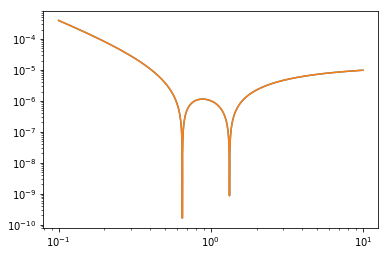

In [9]:

def M_to_Vc(M, R, z, defin='vir'):
    return np.sqrt(G*p1B1_M(M, R, z=z)/R) # in km/s

def p1B4_Phi(M,R,z):
    c = p1B2_c(M,z)
    Rvir = M_to_R(M,z,'vir')
    Vvir = M_to_V(M,z,'vir')
    return -Vvir**2*np.log(1.0+c*R/Rvir)/(fff(c)*R/Rvir)

def p1B8_E(M, Rc, z):
    Vc = M_to_Vc(M, Rc, z)
    E = 0.5*Vc**2+p1B4_Phi(M, Rc, z)
    return E

def p1B9_L(M, Rc, z, eta):
    Vc = M_to_Vc(M, Rc, z)
    Lc = Rc*Vc
    L = eta*Lc
    return L

def p1B3(R, M, E, L):
    return 1.0/R**2 + 2.0 * (p1B4_Phi(M,R,z) - E)/L**2

def fun_Rp(M, Rc, z, eta):
    E = p1B8_E(M, Rc, z)
    L = p1B9_L(M, Rc, z, eta)
    print(Rc, E, L)
    return bisect(p1B3, Rc/10000, Rc+1e-5, args=(M, E, L))


M=1e13
z=0.5
c = p1B2_c(M,z)
print(c)
profile = NFWProfile(M=M, mdef = 'vir', z = z, c = c)
Rvir = profile.RDelta(z, 'vir')

Rc = 1.*Rvir
eta = 0.9

E = p1B8_E(M, Rc, z)
L = p1B9_L(M, Rc, z, eta)
print(E,L)

R_list = np.logspace(np.log10(Rvir/10.),np.log10(Rvir*10),10000)
plt.plot(R_list/Rvir, np.abs(p1B3(R_list, M, E, L)))

def fun(x):
    return p1B3(x, M, E, L)

print(brentq(fun, Rvir/100, Rc)/Rvir)
print(fun_Rp(M, Rc, z, eta))
# plt.plot(R_list/Rvir, np.abs(2*2*(p1B4_Phi(M, R_list, z)-E)/L**2))
# plt.plot(R_list/Rvir, 1./ R_list**2)
# plt.plot(R_list/Rvir, 1./ R_list**2+2*2*(p1B4_Phi(M, R_list, z)-E)/L**2)
plt.xscale('log')
plt.yscale('log')
plt.show()

4.010750270937957
mm:  0.0094153020921
10000000000000.0 100000000000.0 385.539050241 0.5 0.99
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385.539050241 -175864.452863 135062.203275
385

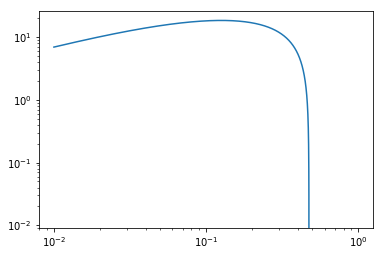

In [10]:
def p1B6_rt(rt, M, m, Rc, z, eta):
    Rp = fun_Rp(M, Rc, z, eta)
    mrt = p1B1_M(m, rt, z)
    MRp = p1B1_M(M, Rp, z)
    Omegap = L/(Rp**2)
    temp = (np.log(p1B1_M(M, Rp*1.001, z))-np.log(p1B1_M(M, Rp*0.999, z))) / \
        (np.log(Rp*1.001)-np.log(Rp*0.999))
    return Rp * ((mrt/MRp)/(2.0+Omegap**2*Rp**3/G/MRp-temp))**(1./3.) - rt
#     return mrt/MRp, Omegap**2*Rp**3/G/MRp, temp

def solve_rt(M, m, Rc, z, eta):
    c = p1B2_c(m,z)
    profile = NFWProfile(M=m, mdef = 'vir', z = z, c = c)
    rvir = profile.RDelta(z, 'vir')
    return bisect(p1B6_rt, 1e-5*rvir, 10*rvir, args=(M, m, Rc, z, eta))

M=1e13
z=0.5
m=M/100.
c = p1B2_c(M,z)
print(c)
profile = NFWProfile(M=M, mdef = 'vir', z = z, c = c)
Rvir = profile.RDelta(z, 'vir')

c = p1B2_c(m,z)
profile = NFWProfile(M=m, mdef = 'vir', z = z, c = c)
rvir = profile.RDelta(z, 'vir')

mrt = p1B1_M(m, rvir, z)
MRp = p1B1_M(M, Rvir, z)
print('mm: ', mrt/MRp)

Rc = .8*Rvir

eta=0.99

print(M, m, Rc, z, eta)
print(solve_rt(M, m, Rc, z, eta)/rvir)

R_list = np.logspace(np.log10(rvir/100.),np.log10(rvir*1),10000)
x = p1B6_rt(R_list, M, m, Rc, z, eta)
plt.plot(R_list/rvir, x)
# plt.plot(R_list/rvir, R_list)
plt.xscale('log')
plt.yscale('log')
plt.show()


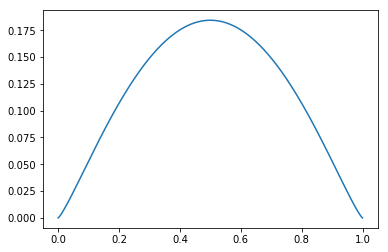

In [11]:
x = np.linspace(0,1,1000)
plt.plot(x, x**1.22*(1-x)**1.22)
plt.show()

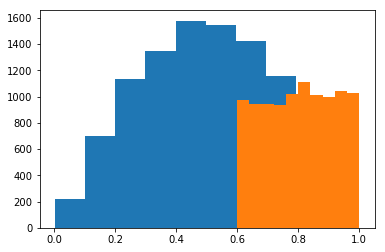

In [12]:
# Equations p1B10,b11
%matplotlib inline
def get_RcRvir_eta(size=100):
    x,y = np.random.uniform(0,1,[2,size*10])
    y *= 0.2
    x = x[y<x**1.22*(1-x)**1.22]
    eta = x[:size].copy()
    RcRvir = np.random.uniform(0.6,1,size)
    return RcRvir, eta

RcRvir, eta = get_RcRvir_eta(10000)
plt.hist(eta)
plt.hist(RcRvir)
plt.show()

## Concentration scatter!

In [13]:
# p1B1-B2
# We assume that, at fixed halo mass,
# the concentrations follow a lognormal distribution with standard
# deviation σ(log c) = 0.12 (e.g. Maccio et al. ` 2010) and with a median
# that depends on halo mass and redshift according to

def c_scatter(c):
    return 10**(np.log10(c)+np.random.normal(loc=0,scale=0.12,size=len(c)))

c = np.ones(10)*10.
c_scatter(c)

array([  7.86883196,  10.97758596,  10.12252185,  17.6361664 ,
        15.51943484,  10.26243408,   9.78063653,  12.43295579,
        14.75013982,   8.87089299])

## Subhalo radial bias

Does not depend on the size of the host halo. 

\S 3.3 of Paper III

In [14]:
def p3e5(x, eta=2.0, nu=4.0):
    return 2**nu * x**eta / (1.0+x)**nu

## Radial bias vs 

From paper III:

We also assume that the radial bias function
is independent of the mass of the subhaloes. This is a valid
assumption, since van den Bosch et al. (2016) have shown
that there is little to no radial segregation of subhaloes by
present-day mass.


## SHMF

In [15]:
np.random.poisson(lam=10)

8

In [70]:
def generate_masses(dat, mmin=-4):
    xp = usmf[:,0]
    fp = -np.gradient(usmf[:,1])
#     print(np.interp(mmin, usmf[:,0], usmf[:,1]))
    Total_N = np.interp(mmin, usmf[:,0], usmf[:,1])
    Total_N = np.random.poisson(lam=Total_N) 
#     print(Total_N)
#     filt = xp>mmin
    x = np.random.uniform(mmin,0,Total_N*30)
    y = np.random.uniform(0,np.interp(mmin, xp, fp), Total_N*30)
    x = x[y<np.interp(x, xp, fp)]
    return x[:Total_N]

usmf = np.genfromtxt('UniversalFit/RESULTS/USMF_M1423_z050.dat')
usmf = np.genfromtxt('UniversalFit/RESULTS/ESMF_M1423_z050.dat')
# usmf = np.genfromtxt('UniversalFit/RESULTS/USMF_M1222_z000.dat')
# plt.plot((usmf[:,0]), usmf[:,1])
# plt.yscale('log')
# plt.xlabel('ln(x)')
# plt.ylabel('dN/dln(x)')

# usmf = np.genfromtxt('UniversalFit/RESULTS/ESMF_M1222_z000.dat')
# dN/dln(x)
plt.plot(usmf[::-1,0], np.gradient(usmf[::-1,1]))
plt.plot(usmf[:,0], (usmf[:,1]))

print(np.interp(x=-4, xp=usmf[:,0], fp=usmf[:,1]))
print(generate_masses(usmf))

plt.hist(generate_masses(usmf),1000,cumulative=-1)
plt.yscale('log')
plt.xlabel('ln(x)')
plt.ylabel('dN/dln(x)')
plt.ylim([1e-2,1e5])
plt.grid()
plt.show()

243.82999999999998
[-3.92486592 -3.95424393 -3.74257798 -3.9424564  -3.85363496 -3.90963289
 -3.82888331 -3.49649658 -3.45675085 -3.53493383 -3.74549414 -3.73113522
 -3.90697258 -2.77800471 -3.17503474 -3.72587088 -3.92394702 -3.98640068
 -2.92294659 -3.79632809 -3.48023798 -3.83800589 -3.31145396 -3.37836113
 -3.52262308 -3.82492695 -3.25797751 -3.70599469 -2.79895521 -3.86308529
 -1.70454994 -3.92736531 -3.79849857 -2.39458415 -3.88178183 -3.99314001
 -3.55678349 -3.03965831 -3.7097619  -2.41868221 -3.08178002 -3.40037486
 -2.83550796 -3.05978674 -2.99941003 -2.70031547 -3.97823818 -2.51801415
 -2.6365076  -3.72500852 -3.88205594 -3.73457388 -3.74677105 -3.91439601
 -3.64370572 -2.99738267 -3.53697891 -3.72454873 -3.88671172 -3.91038442
 -3.88349386 -3.38732845 -3.422684   -3.82165172 -3.44420874 -3.7725539
 -3.72647566 -3.69545884 -3.7936818  -3.69565453 -3.21124314 -3.3239254
 -3.38842812 -3.60431808 -3.39419749 -3.79468201 -3.93775735 -2.92973131
 -3.51318594 -3.93742947 -3.778769

In [71]:

print(np.interp(x=-5, xp=usmf[:,0], fp=usmf[:,0]))

-4.95


In [72]:
filt = usmf[:,0]>-4
np.trapz(x=np.exp(usmf[filt,0]), y=-np.gradient(usmf[filt,1]))

0.88731998408417201

# Full model

Now we define z and M for the host halo, and everything else should be generated randomly.

In [19]:
z_host = 0.5
M_host = 10**14.23

In [20]:
c_host = p1B2_c(M_host,z_host)
c_host = c_scatter([c_host])[0]
print(c_host)

2.79513634627


In [21]:
profile = NFWProfile(M=M_host, mdef = 'vir', z = z_host, c = c_host)
Rvir_host = profile.RDelta(z, 'vir')

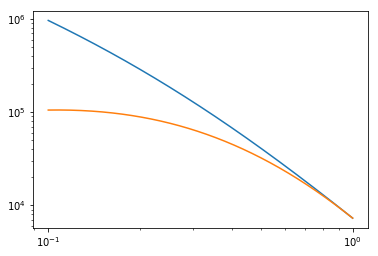

In [22]:
r_list = np.logspace(np.log10(Rvir_host/10), np.log10(Rvir_host*1),1000)
dens_list = profile.density(r=r_list)

plt.plot(r_list/Rvir_host, dens_list)
plt.plot(r_list/Rvir_host, dens_list*p3e5(r_list/Rvir_host))
plt.yscale('log')
plt.xscale('log')
plt.show()

#similar to the P1 Figure 4

0.363


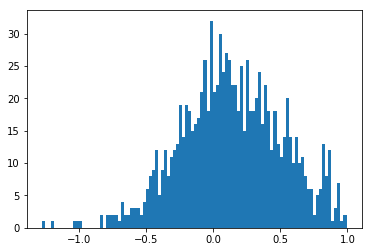

In [23]:
# Paper 3 Eqution between 5 and 6

def radial_PDF(M_host, z_host, c_host):
    profile = NFWProfile(M=M_host, mdef = 'vir', z = z_host, c = c_host)
    Rvir_host = profile.RDelta(z, 'vir')
    r_list = np.logspace(np.log10(Rvir_host/100), np.log10(Rvir_host*10),1000)
    dens_list = profile.density(r=r_list)
    return r_list/Rvir_host, 4*np.pi*r_list**2*dens_list*p3e5(r_list/Rvir_host)

def generate_radiuses(M_host, z_host, c_host, size=1000):
    r_list, r_pdf = radial_PDF(M_host, z_host, c_host)
    r_pdf /= r_pdf.max()
    x,y = np.random.uniform(0,1,[2,size*10])
    x*=10
    x = x[y<np.interp(x=x, xp=r_list, fp=r_pdf)]
    return x[:size]
    
r_list, r_pdf = radial_PDF(M_host, z_host, c_host)
temp = generate_radiuses(M_host, z_host, c_host)
# plt.plot(r_list, r_pdf/r_pdf.max())
plt.hist(np.log10(temp),100)
print(np.sum(temp<1)/len(temp))
plt.show()

In [24]:
# Generating models

smf = np.genfromtxt('UniversalFit/RESULTS/USMF_M1423_z050.dat')


In [35]:
sub_m = np.exp(generate_masses(smf, mmin=-4))*M_host
sub_r = generate_radiuses(M_host, z_host, c_host, size=len(sub_m))*Rvir_host
costheta = np.random.uniform(-1,1, size=len(sub_m))
sub_theta = np.arccos( costheta )
sub_phi = np.random.uniform(0, 2.*np.pi, size=len(sub_m))
sub_c = p1B2_c(sub_m,z_host)
sub_c *= c_scatter(sub_c)
sub_rvir = M_to_R(sub_m,z_host,mdef='vir')

<IPython.core.display.Javascript object>


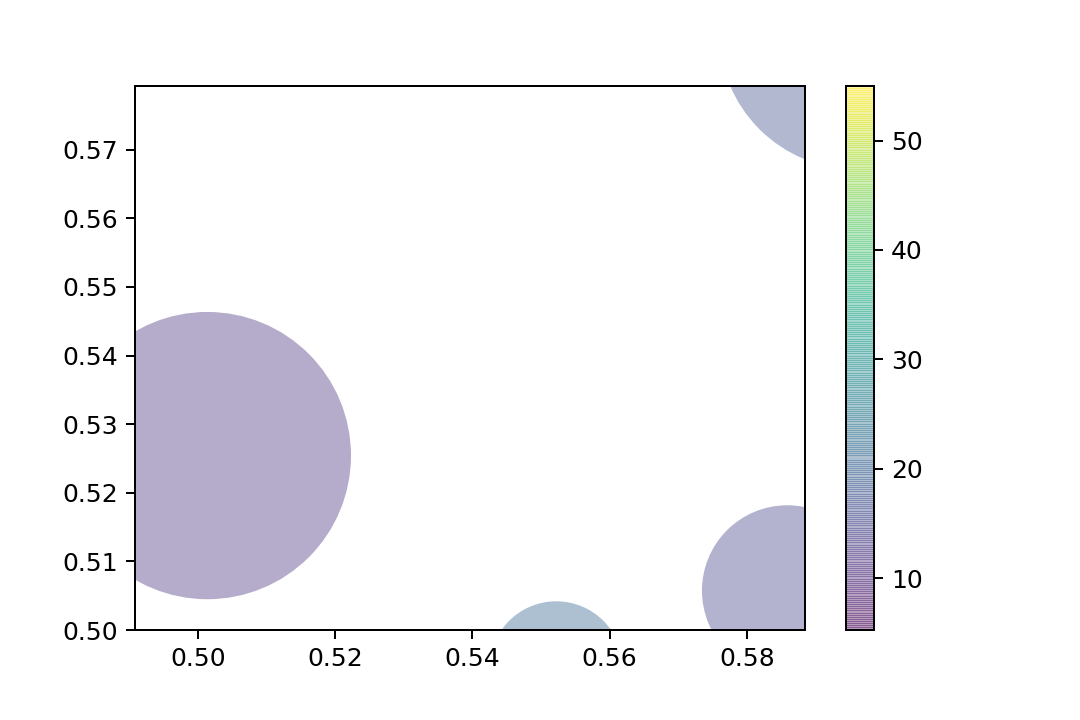

In [39]:

import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

%matplotlib notebook
fig, ax = plt.subplots()

patches = []
for x1, y1, r in zip(np.sin(sub_theta)*np.sin(sub_phi)*sub_r/Rvir_host,
                     np.sin(sub_theta)*np.cos(sub_phi)*sub_r/Rvir_host, 
                     sub_rvir/Rvir_host/sub_c):
    circle = Circle((x1, y1), r, edgecolor='b')
    patches.append(circle)

    

colors = sub_c
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)

fig.colorbar(p, ax=ax)

plt.axis('equal')
plt.xlim([.5,.5+100/Rvir_host])
plt.ylim([.5,.5+100/Rvir_host])
plt.show()

In [56]:

def p1B1_Mc(M, c, R, z):
    Rvir = M_to_R(M,z,'vir')
    return M*fff(c*R/Rvir)/fff(c)

Mx=1e10
zx=0.5
Rvir = M_to_R(Mx,zx,'vir')
cx=25
p1B1_Mc(Mx,cx,Rvir/cx,zx)/Mx

0.084102894038601217

<IPython.core.display.Javascript object>


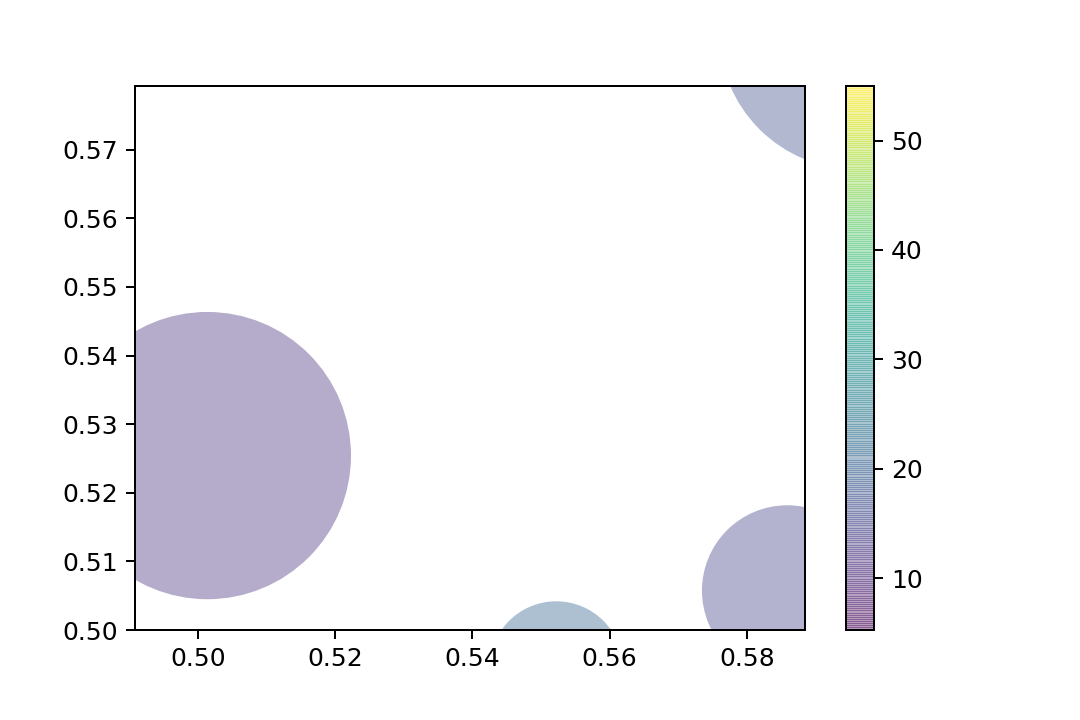

In [40]:

import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

%matplotlib notebook
fig, ax = plt.subplots()

patches = []
for x1, y1, r in zip(np.sin(sub_theta)*np.sin(sub_phi)*sub_r/Rvir_host,
                     np.sin(sub_theta)*np.cos(sub_phi)*sub_r/Rvir_host, 
                     sub_rvir/Rvir_host/sub_c):
    circle = Circle((x1, y1), r, edgecolor='b')
    patches.append(circle)

    

colors = sub_c
p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)

fig.colorbar(p, ax=ax)

plt.axis('equal')
plt.xlim([.5,.5+100/Rvir_host])
plt.ylim([.5,.5+100/Rvir_host])
plt.show()

In [60]:
RcRvir, eta = get_RcRvir_eta(size=len(sub_m))
print(M_host, sub_m[0], RcRvir[0], z, eta[0])

# plt.figure(33)
# r_list = np.linspace(1,1000,1000)
# # plt.plot(r_list/M_to_R(1e10,0.5,'vir'), p1B4_Phi(1e10, r_list, 0.5))
# plt.plot(r_list/M_to_R(1e10,0.5,'vir'), p1B3(1e10, r_list, 0.5))
# plt.xscale('log')
# # plt.yscale('log')
# plt.show()


def p1B4_Phi(M,C,R,z):
#     c = p1B2_c(M,z)
    Rvir = M_to_R(M,z,'vir')
    Vvir = M_to_V(M,z,'vir')
    return -Vvir**2*np.log(1.0+C*R/Rvir)/(fff(C)*R/Rvir)

def p1B3(R, z, C, M, E, L):
    return 1.0/R**2 + 2.0 * (p1B4_Phi(M, C, R, z) - E)/L**2

def p1B8_E(M, C, Rc, z):
    Vc = M_to_Vc(M, Rc, z)
    E = 0.5*Vc**2+p1B4_Phi(M, C, Rc, z)
    return E

def fun_Rp(M, C, Rc, z, eta):
    E = p1B8_E(M, C, Rc, z)
    L = p1B9_L(M, Rc, z, eta)
#     print(Rc, E, L)
    return bisect(p1B3, Rc/10000, Rc+1e-5, args=(z, C, M, E, L))

# fun_Rp(M_host, Rvir_host*0.8, 0.5, 0.8)

def p1B6_rt(rt, C, M, m, Rc, z, eta):
    Rp = fun_Rp(M, C, Rc, z, eta)
    mrt = p1B1_M(m, rt, z)
    MRp = p1B1_M(M, Rp, z)
    Omegap = L/(Rp**2)
    temp = (np.log(p1B1_M(M, Rp*1.001, z))-np.log(p1B1_M(M, Rp*0.999, z))) / \
        (np.log(Rp*1.001)-np.log(Rp*0.999))
    return Rp * ((mrt/MRp)/(2.0+Omegap**2*Rp**3/G/MRp-temp))**(1./3.) - rt

def solve_rt(C, M, m, Rc, z, eta):
    c = p1B2_c(m,z)
    profile = NFWProfile(M=m, mdef = 'vir', z = z, c = c)
    rvir = profile.RDelta(z, 'vir')
#     print(p1B6_rt(rvir,M, m, Rc, z, eta))
#     return 0
    return bisect(p1B6_rt, 1e-10*rvir, 1000*rvir, args=(C, M, m, Rc, z, eta))

solve_rt(M_host, c_host, sub_m[0], RcRvir[0]*Rvir_host, z, 0.5)


169824365246174.6 1.69824365246e+14 0.830805691279 0.5 0.675170619768


726.4928070435159

In [61]:
# sub_m = np.exp(generate_masses(smf, mmin=-4))*M_host

sub_m = np.ones(100)*M_host
sub_r = generate_radiuses(M_host, z_host, c_host, size=len(sub_m))*Rvir_host
costheta = np.random.uniform(-1,1, size=len(sub_m))
sub_theta = np.arccos( costheta )
sub_phi = np.random.uniform(0, 2.*np.pi, size=len(sub_m))
sub_c = p1B2_c(sub_m,z_host)
# sub_c *= c_scatter(sub_c)
sub_rvir = M_to_R(sub_m,z_host,mdef='vir')

sub_RcRvir, sub_eta = get_RcRvir_eta(size=len(sub_m))

In [62]:
sub_rt = np.zeros(len(sub_m))
for i in range(len(sub_m)):
#     sub_rt[i] = solve_rt(M_host, c_host, sub_m[i], sub_RcRvir[i]*Rvir_host, z, sub_eta[i])
    sub_rt[i] = solve_rt(M_host, c_host, sub_m[i], sub_r[i], z, sub_eta[i])
    print(i,M_host, c_host, sub_m[i], sub_RcRvir[i], z, sub_eta[i],sub_rt[i])


0 169824365246174.6 2.79513634627 1.69824365246e+14 0.606727006401 0.5 0.15836818968 1.18726910798
1 169824365246174.6 2.79513634627 1.69824365246e+14 0.749856233178 0.5 0.8516548984 15760.7240894
2 169824365246174.6 2.79513634627 1.69824365246e+14 0.697601041691 0.5 0.619389860882 21473.7135258
3 169824365246174.6 2.79513634627 1.69824365246e+14 0.710700450151 0.5 0.259839901527 604.781311178
4 169824365246174.6 2.79513634627 1.69824365246e+14 0.935033439982 0.5 0.709532006678 2800.51598207
5 169824365246174.6 2.79513634627 1.69824365246e+14 0.832965408056 0.5 0.894770060558 3301.24047894
6 169824365246174.6 2.79513634627 1.69824365246e+14 0.602067796192 0.5 0.507965228247 190.016919545
7 169824365246174.6 2.79513634627 1.69824365246e+14 0.907618144039 0.5 0.55056930931 152.761855793
8 169824365246174.6 2.79513634627 1.69824365246e+14 0.730307876371 0.5 0.457165164524 182.209093064
9 169824365246174.6 2.79513634627 1.69824365246e+14 0.690668680502 0.5 0.54100356738 737.224399231
10 16

83 169824365246174.6 2.79513634627 1.69824365246e+14 0.954000693876 0.5 0.764246801702 3621.58102324
84 169824365246174.6 2.79513634627 1.69824365246e+14 0.908358849708 0.5 0.679555949519 6323.28909154
85 169824365246174.6 2.79513634627 1.69824365246e+14 0.727205151994 0.5 0.47175572072 7585.9213999
86 169824365246174.6 2.79513634627 1.69824365246e+14 0.851315810556 0.5 0.226478539691 1431.64558406
87 169824365246174.6 2.79513634627 1.69824365246e+14 0.810830748012 0.5 0.24009075967 937.961960688
88 169824365246174.6 2.79513634627 1.69824365246e+14 0.843681810273 0.5 0.688465065533 1632.20832389
89 169824365246174.6 2.79513634627 1.69824365246e+14 0.734416189697 0.5 0.111990104388 350.20884583
90 169824365246174.6 2.79513634627 1.69824365246e+14 0.998177974771 0.5 0.589580390795 13195.7845801
91 169824365246174.6 2.79513634627 1.69824365246e+14 0.9306418803 0.5 0.585323250515 8726.02860277
92 169824365246174.6 2.79513634627 1.69824365246e+14 0.630813281381 0.5 0.408511872512 17.6810859

In [63]:
rvir = M_to_R(M=sub_m[0], z=0.5, mdef='vir')

<IPython.core.display.Javascript object>


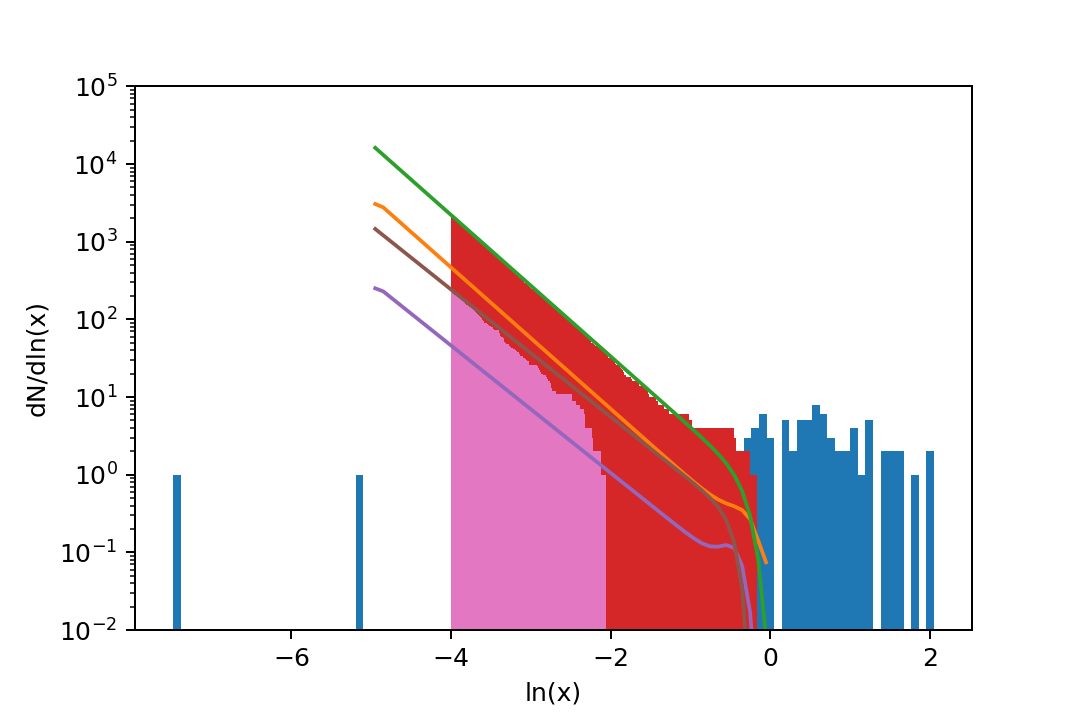

In [64]:
plt.figure(49)
plt.hist(np.log10(sub_rt[:100]/rvir),100)
plt.show()

In [66]:
np.median(sub_rt[:100]/rvir)

2.2364864222149969

In [ ]:
sub_rt